# Observations and Insights
### a. In this study, 248 mice identified with SCC tumor growth were treated through a ten drug regimens. 
### b. Over the course of 45 days, tumor development was observed and measured. 
### c. The purpose of this study was to compare the performance of Pymaceutical drug Capomulin, versus the 9 other treatments.
### d. Based on this study, I have made the following 4 observations about the data:

##  1. Drug regimens Capomulin and Ramicane were the best treatments with consistently low tumor average and standard deviation. Capomulin has a tumor mean volume of 40.68 mm3 and standard deviation of 4.99. Ramicane has a tumor mean volume of 40.22 mm3 and standard deviation of 4.85.

##  2. When treated with Capomulin, the tumor volume of Mouse s185 (see line plot below) decreased over time from 48.16 mm3 to 23.34 mm3. Please see line plot  Point vs Tumor Volume that isolates the tumor volume in Mouse s185. See Time Point vs Tumor Volume (Line Plot below). 

##  3. As noted in Mouse Weight versus Average Tumor Volume below, the average tumor volume increased with the increase in mouse weight. The correlation between mouse weight and average tumor volume is 0.84.

## 4. The mice tested were nearly equal in distribution according to sex. Male mice were slightly higher at 51% vs female mice at 49%.# Observations and Insights
### In this study, 248 mice identified with SCC tumor growth were treated through a ten drug regimens. 
### Over the course of 45 days, tumor development was observed and measured. 
### The purpose of this study was to compare the performance of Pymaceutical drug Capomulin, versus the 9 other treatments.
### Based on this study, I have made the following 4 observations about the data:

##  1. Drug regimens Capomulin and Ramicane were the best treatments with consistently low tumor average and standard deviation. Capomulin has a tumor mean volume of 40.68 mm3 and standard deviation of 4.99. Ramicane has a tumor mean volume of 40.22 mm3 and standard deviation of 4.85.

##  2. When treated with Capomulin, the tumor volume of Mouse s185 (see line plot below) decreased over time from 48.16 mm3 to 23.34 mm3. Please see line plot  Point vs Tumor Volume that isolates the tumor volume in Mouse s185. See Time Point vs Tumor Volume (Line Plot below). 

##  3. As noted in Mouse Weight versus Average Tumor Volume below, the average tumor volume increased with the increase in mouse weight. The correlation between mouse weight and average tumor volume is 0.84.

## 4. The mice tested were nearly equal in distribution according to sex. Male mice were slightly higher at 51% vs female mice at 49%.


## Code for Capomulin Study

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from sklearn import datasets
from scipy.stats import linregress
from colorama import init
from termcolor import colored

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Define DataFrames for both files
mouse_metadata_df = mouse_metadata
study_results_df = study_results


In [2]:
# Combine the data into a single dataset

mouse_study_df = pd.merge(study_results, mouse_metadata, how = "left", on ="Mouse ID")

# Display the data table for preview

mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.

# storing unique value in a variable
Mouse_value_df = mouse_metadata["Mouse ID"].nunique()
  
# printing value
print(Mouse_value_df)

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_ids = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

#step 1
mouse_study_df["Mouse ID"] == "g989"

#step2
mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_study_df = mouse_study_df[mouse_study_df["Mouse ID"].isin(duplicate_ids)==False]
clean_mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.

clean_mouse_study_df["Mouse ID"].nunique()



248

## Summary Statistics

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

sum_stats = pd.DataFrame(mouse_study_df.groupby("Drug Regimen").count())
sum_stats['Mean'] = mouse_study_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
sum_stats['Median'] = mouse_study_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
sum_stats['Variance'] = mouse_study_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sum_stats['Standard Deviation'] = mouse_study_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sum_stats['SEM'] = mouse_study_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sum_stats = sum_stats[["Mean", "Median", "Variance", "Standard Deviation", "SEM"]]
sum_stats.rename(columns = {"Mean":"Mean Tumor Volume", "Meadian":"Meadian Tumor Volume", "Variance":"Tumor Volume Variance",
                            "Standard Deviation":"Tumor Volume Std. Dev.", "SEM":"Tumor Volume Std. Err."}, inplace="True")
sum_stats

,Mean Tumor Volume,Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Rename columns
sum_stats.rename(columns = {"Mean Tumor Volume":"Mean", "Meadian Tumor Volume":"Meadian","Tumor Volume Variance":"Variance",
                            "Tumor Volume Std. Dev.":"Standard Deviation", "Tumor Volume Std. Err.":"SEM"}, inplace="True")
sum_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_stats = sum_stats[["Mean", "Median", "Variance", "Standard Deviation", "SEM"]]

sum_stats['Mean'] = sum_stats['Mean'].map("{:,.4f}".format)
sum_stats['Median'] = sum_stats['Median'].map("{:,.4f}".format)
sum_stats['Variance'] = sum_stats['Variance'].map("{:,.4f}".format)
sum_stats['Standard Deviation'] = sum_stats['Standard Deviation'].map("{:,.4f}".format)
sum_stats['SEM'] = sum_stats['SEM'].map("{:,.4f}".format)
sum_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3226,50.8546,42.3511,6.5078,0.5129
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Using the aggregation method, produce the same summary statistics in a single line

sum_stats_df = pd.DataFrame(mouse_study_df.groupby(["Drug Regimen"]).count()).reset_index()
sum_stats_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,161,161,161,161,161,161,161
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


In [12]:
# Isolate the columns in the the DataFrame
regimen_data = mouse_study_df[["Drug Regimen","Mouse ID"]]
regimen_data

,Drug Regimen,Mouse ID
0,Capomulin,b128
1,Ketapril,f932
2,Ketapril,g107
3,Ketapril,a457
4,Ketapril,c819
...,...,...
1888,Capomulin,r944
1889,Capomulin,u364
1890,Ceftamin,p438
1891,Placebo,x773


In [13]:
# Define data for bar plot so "Drug Regimen" is x-axis label
datapoints = clean_mouse_study_df['Drug Regimen'].value_counts()
#datapoints = datapoints.rename(columns = {"Mouse ID" : "Trial"})
datapoints

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

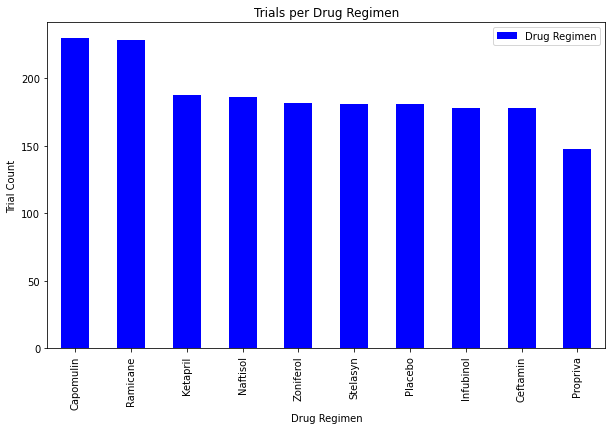

In [14]:
# Define bar chart information
datapoints.plot(kind="bar", figsize=(10,6), color = "b", legend=True)

plt.title("Trials per Drug Regimen")
plt.ylabel("Trial Count")
plt.xlabel("Drug Regimen")
plt.show()
#plt.tight_layout()

# sns.barplot(x='Drug Regimen',
#             y="Trial Count", sum_stats=sum_stats_df, 
#             order=sum_stats_df.sort_values('Drug Regimen'))

In [15]:
datapoints.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

In [16]:
# Define data for bar plot so "Drug Regimen" is x-axis label
# Create a list indicating where to write x labels and set figure size to adjust for space


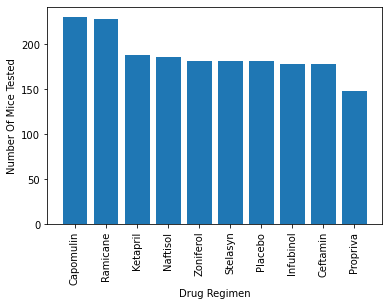

<Figure size 432x288 with 0 Axes>

In [17]:
# Define bar chart information
plt.bar(datapoints.index.values,datapoints.values)

# plt.title("Drug Regimen")
plt.ylabel("Number Of Mice Tested")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

# TODO - add drug regimen resort 

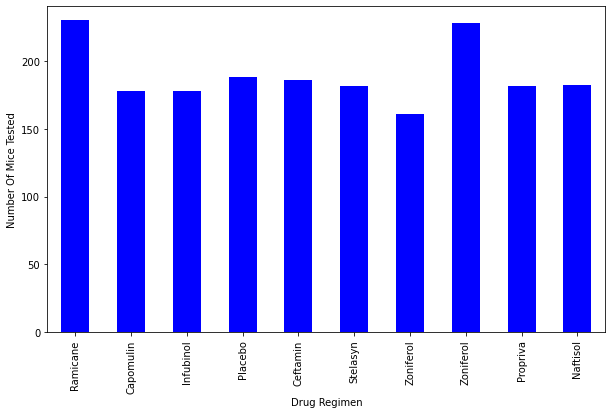

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Define DataFrame; based on each timepoint, show the total of mice for every treatment

# Define data for bar plot so "Drug Regimen" is x-axis label
datapoints = sum_stats_df[["Mouse ID"]]
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Define where to write x label and set chart size
plt.figure(figsize=(10,6))
plt.bar(x_axis, datapoints["Mouse ID"], color="b", width = .5)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Ramicane", "Capomulin", "Infubinol", "Placebo", "Ceftamin", "Stelasyn", "Zoniferol", "Zoniferol", "Propriva", "Naftisol"])

# Set x and y limits
plt.xlim(-.5, len(x_axis)-.5)
plt.ylim(0, max(datapoints["Mouse ID"])+10)
datapoints = datapoints.rename(columns = {"Mouse ID" : "Trial"})

# Set title and labels
#plt.title("Trials per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number Of Mice Tested")

# Save and display graph
plt.show()




# TODO - add drug regimen resort 


In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

## Pie Plot created with Pandas
#Distribution of Male vs Female Mice

# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_mouse_study_df.groupby('Sex')
gender_qty = gender["Sex"].count()
gender_qty

Sex
Female    922
Male      958
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

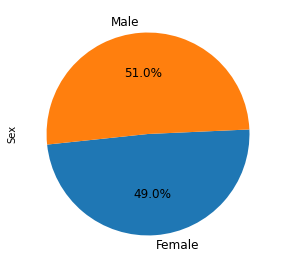

In [20]:
# Create pie plot with data
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect = 'equal')
gender_qty.plot(kind='pie', y = "Quantity", ax=ax1, autopct = '%1.1f%%',
              startangle = 186, shadow = False, legend = False, fontsize = 12)

In [21]:
## Pie Plot created with PyPlot
# Distribution of Male vs Female Mice

# Define DataFrame; based on mouse sex, show distribution of female versus male mice using Matplotlib's 'pyplot'
# Generate a pie plot showing the distribution of female versus male mice using pyplot 
gender = clean_mouse_study_df["Sex"].value_counts()

gender


Male      958
Female    922
Name: Sex, dtype: int64

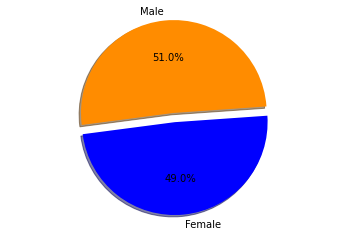

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Labels sections of the pie plot
labels = ["Male", "Female"]

# Define colors of each section of pie plot
colors = ["darkorange", "blue"]

# Define counts
counts = np.array(gender)

# Define each section
explode = (0.1, 0)


# Direct matplotlib to create a pie chart based upon the above data
plt.pie(gender, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow = True, startangle = 364)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# plt.title("Distribution of Male vs Female Mice")

# Display pie plot
plt.show()



## Quartiles, Outliers and Boxplots

In [23]:



# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Define main dataframe
clean_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Define DataFrames of Ramicane, Capomulin, Propriva and Ceftamin
capomulin2_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == "Ramicane",:]
Infubinol_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == "Infubinol",:]
ceftamin_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == "Ceftamin", :]
capomulin2_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [26]:
ramicane_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
58,c458,0,45.000000,0,Ramicane,Female,23,20
59,q610,0,45.000000,0,Ramicane,Female,18,21
60,j913,0,45.000000,0,Ramicane,Female,4,17
61,a411,0,45.000000,0,Ramicane,Male,3,22
62,a444,0,45.000000,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
1867,u196,45,40.667713,3,Ramicane,Male,18,25
1870,g791,45,29.128472,1,Ramicane,Male,11,16
1874,r811,45,37.225650,1,Ramicane,Male,9,19
1879,a644,45,32.978522,1,Ramicane,Female,7,17


In [27]:
Infubinol_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
33,y163,0,45.000000,0,Infubinol,Female,17,27
...,...,...,...,...,...,...,...,...
1789,k483,45,66.196912,3,Infubinol,Female,20,30
1794,a685,45,66.083066,3,Infubinol,Male,8,30
1802,e476,45,62.435404,1,Infubinol,Male,23,26
1804,a203,45,67.973419,2,Infubinol,Female,20,23


In [28]:
ceftamin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
170,x822,0,45.000000,0,Ceftamin,Male,3,29
171,l558,0,45.000000,0,Ceftamin,Female,13,30
172,l733,0,45.000000,0,Ceftamin,Female,4,30
173,f436,0,45.000000,0,Ceftamin,Female,3,25
174,l490,0,45.000000,0,Ceftamin,Male,24,26
...,...,...,...,...,...,...,...,...
1858,k210,45,68.923185,3,Ceftamin,Male,15,28
1862,x822,45,61.386660,3,Ceftamin,Male,3,29
1864,l733,45,64.299830,1,Ceftamin,Female,4,30
1872,o287,45,59.741901,4,Ceftamin,Male,2,28


In [29]:
# Ramicane - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
ramicane_max = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_max)
ramicane_max

Mouse ID
a411    45
a444    45
a520    45
a644    45
c458    30
c758    45
d251    45
e662    45
g791    45
i177    45
i334    45
j913    45
j989    45
k403    45
m546    45
n364    45
q597    45
q610    35
r811    45
r921    30
s508    45
u196    45
w678     5
y449    15
z578    45
Name: Timepoint, dtype: int64

In [30]:
ramicane_vol

,Timepoint
Mouse ID,
a411,45
a444,45
a520,45
a644,45
c458,30
c758,45
d251,45
e662,45
g791,45


In [31]:
# Merge new data to dataframe

ramicane_merge = pd.merge(ramicane_vol, clean_mouse_study_df, on=("Mouse ID", "Timepoint"),how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [32]:
# Ramicane - Calculate the final tumor volume with drug regimen Ramicane

tumor_ramicane = ramicane_merge["Tumor Volume (mm3)"]
tumor_ramicane

0     38.407618
1     43.047543
2     38.810366
3     32.978522
4     38.342008
5     33.397653
6     37.311236
7     40.659006
8     29.128472
9     33.562402
10    36.374510
11    31.560470
12    36.134852
13    22.050126
14    30.564625
15    31.095335
16    45.220869
17    36.561652
18    37.225650
19    43.419381
20    30.276232
21    40.667713
22    43.166373
23    44.183451
24    30.638696
Name: Tumor Volume (mm3), dtype: float64

In [33]:
# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"For Ramicane regimen, please note the following:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

For Ramicane regimen, please note the following:
The upper quartile of tumor volume is: 40.65900627.
The lower quartile of tumor volume is: 31.56046955.
The interquartile range of tumor volme is: 9.098536719999998.
The median of tumor volume is: 36.56165229.


In [34]:
# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"For Ramicane regimen, please note the following:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")


For Ramicane regimen, please note the following:
The upper quartile of tumor volume is: 40.65900627.
The lower quartile of tumor volume is: 31.56046955.
The interquartile range of tumor volme is: 9.098536719999998.
The median of tumor volume is: 36.56165229.


In [35]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")


Values above 54.30681135 could be outliers.
Values below 17.912664470000003 could be outliers.


In [36]:
# Capomulin - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
capomulin_max = capomulin2_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_max)
capomulin_max

Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
i557    45
i738    45
j119    45
j246    35
l509    45
l897    45
m601    45
m957    45
r157    15
r554    45
r944    45
s185    45
s710    45
t565    45
u364    45
v923    45
w150    10
w914    45
x401    45
y793    45
Name: Timepoint, dtype: int64

In [37]:
capomulin_vol

,Timepoint
Mouse ID,
b128,45
b742,45
f966,20
g288,45
g316,45
i557,45
i738,45
j119,45
j246,35


In [38]:
# Merge new data to dataframe

capomulin_merge = pd.merge(capomulin_vol, clean_mouse_study_df, on=("Mouse ID", "Timepoint"),how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [39]:
# Calculate the final tumor volume

tumor_capomulin = capomulin_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For Capomulin regimen, please note the following:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")


For Capomulin regimen, please note the following:
The upper quartile of tumor volume is: 40.1592203.
The lower quartile of tumor volume is: 32.37735684.
The interquartile range of tumor volme is: 7.781863460000004.
The median of tumor volume is: 38.125164399999996.


In [40]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

Values above 51.83201549 could be outliers.
Values below 20.70456164999999 could be outliers.


In [41]:
# Infubinol - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
Infubinol_max = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_max)
print(Infubinol_max)
print(Infubinol_vol)

Mouse ID
a203    45
a251    45
a577    30
a685    45
c139    45
c326     5
c895    30
e476    45
f345    45
i386    40
k483    45
k804    35
m756     5
n671    30
o809    35
o813     5
q132    30
s121    25
v339     5
v719    20
v766    15
w193    20
w584    30
y163    45
z581    45
Name: Timepoint, dtype: int64
          Timepoint
Mouse ID           
a203             45
a251             45
a577             30
a685             45
c139             45
c326              5
c895             30
e476             45
f345             45
i386             40
k483             45
k804             35
m756              5
n671             30
o809             35
o813              5
q132             30
s121             25
v339              5
v719             20
v766             15
w193             20
w584             30
y163             45
z581             45


In [42]:
# Merge new data to dataframe
Infubinol_merge = pd.merge(Infubinol_vol, clean_mouse_study_df, on=("Mouse ID", "Timepoint"),how="left")
Infubinol_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [43]:
# Infubinol - Calculate the final tumor volume with drug regimen Infubinol
tumor_Infubinol = Infubinol_merge["Tumor Volume (mm3)"]
tumor_Infubinol

0     67.973419
1     65.525743
2     57.031862
3     66.083066
4     72.226731
5     36.321346
6     60.969711
7     62.435404
8     60.918767
9     67.289621
10    66.196912
11    62.117279
12    47.010364
13    60.165180
14    55.629428
15    45.699331
16    54.656549
17    55.650681
18    46.250112
19    54.048608
20    51.542431
21    50.005138
22    58.268442
23    67.685569
24    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [44]:
# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For Infubinol regimen, please note the following:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")


For Infubinol regimen, please note the following:
The upper quartile of tumor volume is: 65.52574285.
The lower quartile of tumor volume is: 54.04860769.
The interquartile range of tumor volme is: 11.477135160000003.
The median of tumor volume is: 60.16518046.


In [45]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

Values above 82.74144559000001 could be outliers.
Values below 36.83290494999999 could be outliers.


In [46]:
# Ceftamin - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
ceftamin_max = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_max)

In [47]:
ceftamin_max

Mouse ID
a275    45
b447     0
b487    25
b759    30
f436    15
h531     5
j296    45
k210    45
l471    45
l490    30
l558    10
l661    45
l733    45
o287    45
p438    45
q483    40
t573     0
u149    25
u153     0
w151    45
x226     0
x581    45
x822    45
y769    45
y865    45
Name: Timepoint, dtype: int64

In [48]:
ceftamin_vol

,Timepoint
Mouse ID,
a275,45
b447,0
b487,25
b759,30
f436,15
h531,5
j296,45
k210,45
l471,45


In [49]:
# Merge new data to dataframe
ceftamin_merge = pd.merge(ceftamin_vol, clean_mouse_study_df, on=("Mouse ID", "Timepoint"),how="left")
ceftamin_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [50]:
# Ceftamin - Calculate the tumor volume with drug regimen
tumor_ceftamin = ceftamin_merge["Tumor Volume (mm3)"]
tumor_ceftamin

0     62.999356
1     45.000000
2     56.057749
3     55.742829
4     48.722078
5     47.784682
6     61.849023
7     68.923185
8     67.748662
9     57.918381
10    46.784535
11    59.851956
12    64.299830
13    59.741901
14    61.433892
15    64.192341
16    45.000000
17    52.925348
18    45.000000
19    67.527482
20    45.000000
21    64.634949
22    61.386660
23    68.594745
24    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [51]:
# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"For Ceftamin regimen, please note the following:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")


For Ceftamin regimen, please note the following:
The upper quartile of tumor volume is: 64.29983003.
The lower quartile of tumor volume is: 48.72207785.
The interquartile range of tumor volme is: 15.577752179999997.
The median of tumor volume is: 59.85195552.


In [52]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

Values above 87.66645829999999 could be outliers.
Values below 25.355449580000002 could be outliers.


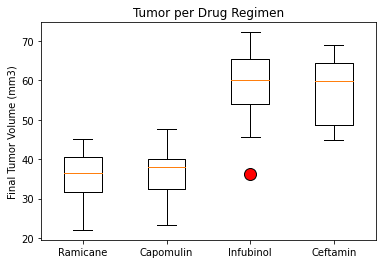

In [53]:

# Generate a box plot of tumor volumes of each mouse of four promising drug regimens
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

data_to_plot = [tumor_ramicane, tumor_capomulin, tumor_Infubinol, tumor_ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor per Drug Regimen')
# ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')

outlier_dot = dict(markerfacecolor='red',markersize=12)

ax1.boxplot(data_to_plot, labels=["Ramicane","Capomulin","Infubinol","Ceftamin",],flierprops=outlier_dot)

plt.savefig('boxplot')
plt.show()

In [78]:
data_to_plot

[0     38.407618
 1     43.047543
 2     38.810366
 3     32.978522
 4     38.342008
 5     33.397653
 6     37.311236
 7     40.659006
 8     29.128472
 9     33.562402
 10    36.374510
 11    31.560470
 12    36.134852
 13    22.050126
 14    30.564625
 15    31.095335
 16    45.220869
 17    36.561652
 18    37.225650
 19    43.419381
 20    30.276232
 21    40.667713
 22    43.166373
 23    44.183451
 24    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     38.982878
 1     38.939633
 2     30.485985
 3     37.074024
 4     40.159220
 5     47.685963
 6     37.311846
 7     38.125164
 8     38.753265
 9     41.483008
 10    38.846876
 11    28.430964
 12    33.329098
 13    46.539206
 14    32.377357
 15    41.581521
 16    23.343598
 17    40.728578
 18    34.455298
 19    31.023923
 20    40.658124
 21    39.952347
 22    36.041047
 23    28.484033
 24    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 2     57.031862
 3     66.083

## Line and Scatter Pl
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Mouse l509 treated with Capomulin

In [55]:
## Line Plot of Time Point vs Tumor Volume 
capomulin_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,226,j246,0,45.0,0,Capomulin,Female,21,21
2,227,r554,0,45.0,0,Capomulin,Female,8,17
3,228,s185,0,45.0,0,Capomulin,Female,3,17
4,229,b742,0,45.0,0,Capomulin,Male,7,21


In [56]:
# Isolate data of a single mouse (l509)
# Remember loc -> slicing by names!
capomulin_l509_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509"]
capomulin_l509_df.head()


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
6,231,l509,0,45.000000,0,Capomulin,Male,17,21
25,253,l509,5,45.851193,0,Capomulin,Male,17,21
55,539,l509,10,46.759074,0,Capomulin,Male,17,21
96,881,l509,15,47.488599,1,Capomulin,Male,17,21
106,982,l509,20,48.070452,2,Capomulin,Male,17,21


In [57]:
# Isolate columns of single mouse (l509)
capomulin_l509_df = capomulin_l509_df.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
capomulin_l509_df

,Timepoint,Tumor Volume (mm3)
6,0,45.000000
25,5,45.851193
55,10,46.759074
96,15,47.488599
106,20,48.070452
126,25,44.006257
160,30,44.708055
170,35,40.207289
202,40,40.770813
211,45,41.483008


In [58]:
# Set the index of capomulin_l509_df
capomulin_l509_df = capomulin_l509_df.reset_index(drop=True)
capomulin_l509_df

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,45.851193
2,10,46.759074
3,15,47.488599
4,20,48.070452
5,25,44.006257
6,30,44.708055
7,35,40.207289
8,40,40.770813
9,45,41.483008


Text(0.5, 1.0, 'Time Point vs Tumor Volume of Mouse l509 with Capomulin Treatment')

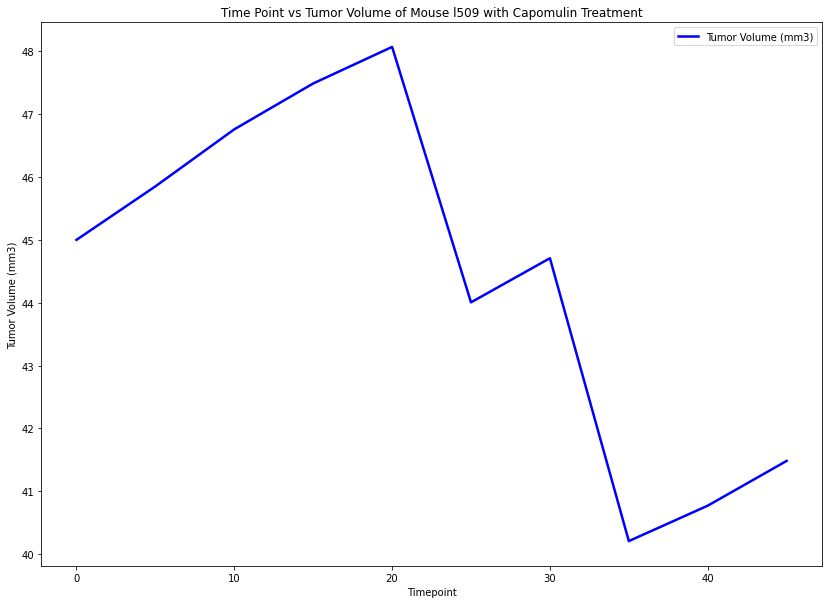

In [59]:
# Generate a line plot of time point versus tumor volume for a mouse (l509) treated with Capomulin
capomulin_l509_df.set_index('Timepoint').plot(figsize=(14,10), linewidth=2.5, color='blue')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Time Point vs Tumor Volume of Mouse l509 with Capomulin Treatment")

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
## Line Plot of Time Point vs Tumor Volume 
#Mouse s185 treated with Capomulin

In [60]:
# Isolate data of a single mouse (s185)
# Remember loc -> slicing by names!
capomulin_s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capomulin_s185_df.head()## Line Plot of Time Point vs Tumor Volume 
#Mouse s185 treated with Capomulin

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Isolate Capomulin Drug Regimen
capomulin_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,226,j246,0,45.0,0,Capomulin,Female,21,21
2,227,r554,0,45.0,0,Capomulin,Female,8,17
3,228,s185,0,45.0,0,Capomulin,Female,3,17
4,229,b742,0,45.0,0,Capomulin,Male,7,21


In [61]:
# Isolate columns of single mouse (s185)
capomulin_s185_df = capomulin_s185_df.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
capomulin_s185_df

,Timepoint,Tumor Volume (mm3)
3,0,45.000000
43,5,43.878496
69,10,37.614948
75,15,38.177232
105,20,36.866876
132,25,33.949940
154,30,32.959671
167,35,28.328531
190,40,25.472143
223,45,23.343598


In [62]:
# Set the index of capomulin_s185_df
capomulin_s185_df = capomulin_s185_df.reset_index(drop=True)
capomulin_s185_df

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,43.878496
2,10,37.614948
3,15,38.177232
4,20,36.866876
5,25,33.949940
6,30,32.959671
7,35,28.328531
8,40,25.472143
9,45,23.343598


Text(0.5, 1.0, 'Time Point vs Tumor Volume of Mouse s185 with Capomulin Treatment')

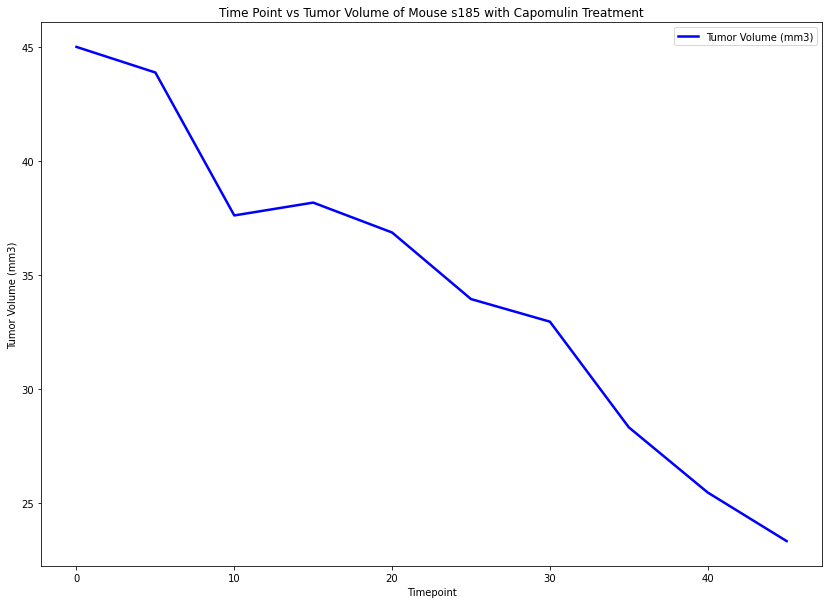

In [63]:
# Generate a line plot of time point versus tumor volume for a mouse (l509) treated with Capomulin
capomulin_s185_df.set_index('Timepoint').plot(figsize=(14,10), linewidth=2.5, color='blue')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Time Point vs Tumor Volume of Mouse s185 with Capomulin Treatment")

In [64]:
## Scatter Plot of Mouse Weight vs Average Tumor Volume 
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Drug Regimen is Capomulin
# Isolate Capomulin Drug Regimen data from above
capomulin_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,226,j246,0,45.0,0,Capomulin,Female,21,21
2,227,r554,0,45.0,0,Capomulin,Female,8,17
3,228,s185,0,45.0,0,Capomulin,Female,3,17
4,229,b742,0,45.0,0,Capomulin,Male,7,21


In [65]:
# Isolate columns of Capomulin
capomulin_filtered_df = capomulin_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_filtered_df.head()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,45.0
1,j246,21,45.0
2,r554,17,45.0
3,s185,17,45.0
4,b742,21,45.0


In [66]:
# Calculate the average tumor volume per mouse and weight with drug regimen = Capomulin
capomulin_mean = pd.DataFrame(capomulin_filtered_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
capomulin_mean

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


In [67]:
# Rename tumor volume column to Average Tumor Volume
capomulin_mean = capomulin_mean.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
capomulin_mean.head()


,Mouse ID,Weight (g),Average Tumor Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


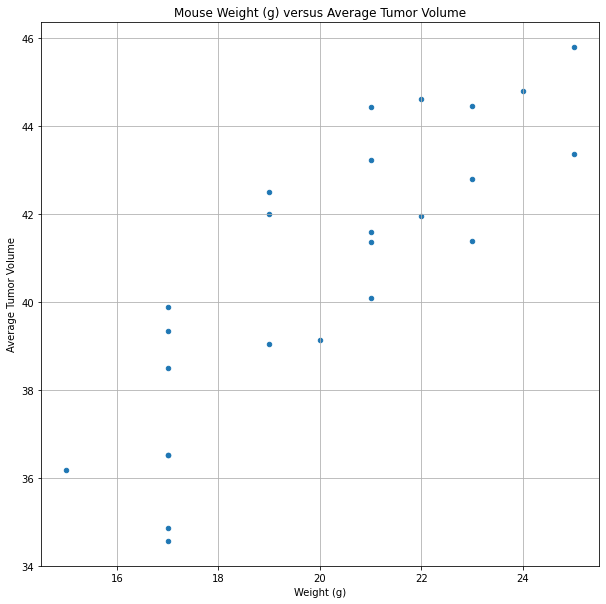

In [68]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mean = capomulin_mean.set_index('Mouse ID')

capomulin_mean.plot(kind = "scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(10,10), 
                    title="Mouse Weight (g) versus Average Tumor Volume")
plt.show()



## Correlation and Regression

In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Isolate mouse weight and average tumor volume
mouse_weight = capomulin_mean.iloc[:,0]
average_tumor_volume = capomulin_mean.iloc[:,1]
mouse_weight

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

In [70]:
average_tumor_volume

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Average Tumor Volume, dtype: float64

In [71]:
# Calculate the correlation coefficient

correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")

The correlation between mouse weight and average tumor volume is 0.84.


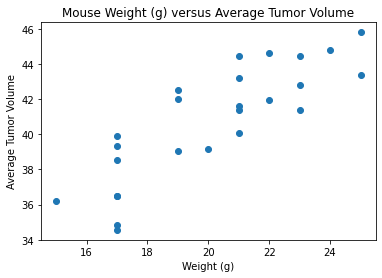

In [72]:
# Create beginning steps for linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume")
plt.show()

In [73]:
# Add the linear regression equation and line to plot

x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [74]:
x_values

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

In [75]:
y_values

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Average Tumor Volume, dtype: float64

In [76]:
# y=mx+b

y=slope*x_values[0]+intercept
print(f'Predicted y is {y} vs an actual value of {y_values[0]}')


Predicted y is 42.54983369121531 vs an actual value of 41.963635634


The r-squared is: 0.7088568047708717


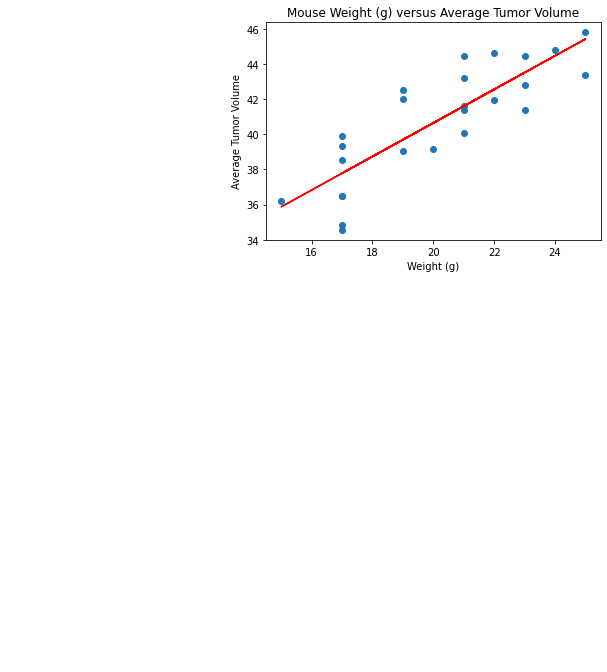

In [77]:
# Calculate regress values, r-squared, etc

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()